In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
""" Generate list of filepaths where select.txt files have multiple rows. """

# Find file paths where select.txt files have multiple rows 
# Used before filtering algo updated 
# Generates separate .txt files with filepath list

def find_folders_with_multiple_rows(base_dir):
    folders_with_multiple_rows = []

    for root, _, files in os.walk(base_dir):
        if "select.txt" in files:
            select_file_path = os.path.join(root, "select.txt")
            with open(select_file_path, "r") as file:
                lines = file.readlines()
                if len(lines) > 1:
                    folders_with_multiple_rows.append(root)

    folders_with_multiple_rows.sort()

    with open("folders_with_multiple_rows.txt", "w") as output_file:
        for folder in folders_with_multiple_rows:
            output_file.write(f"{folder}\n")
        
        output_file.write(f"\nNumber of folders with multiple-row select.txt files: {len(folders_with_multiple_rows)}\n")


    print("List of folders with multiple rows in select.txt has been written to folders_with_multiple_rows.txt")


if __name__ == "__main__":
    import argparse
    parser = argparse.ArgumentParser(description="Find folders with select.txt files containing more than one row")
    parser.add_argument("--base_dir", type=str, required=True, help="Base directory to search")
    args = parser.parse_args()

    find_folders_with_multiple_rows(args.base_dir)

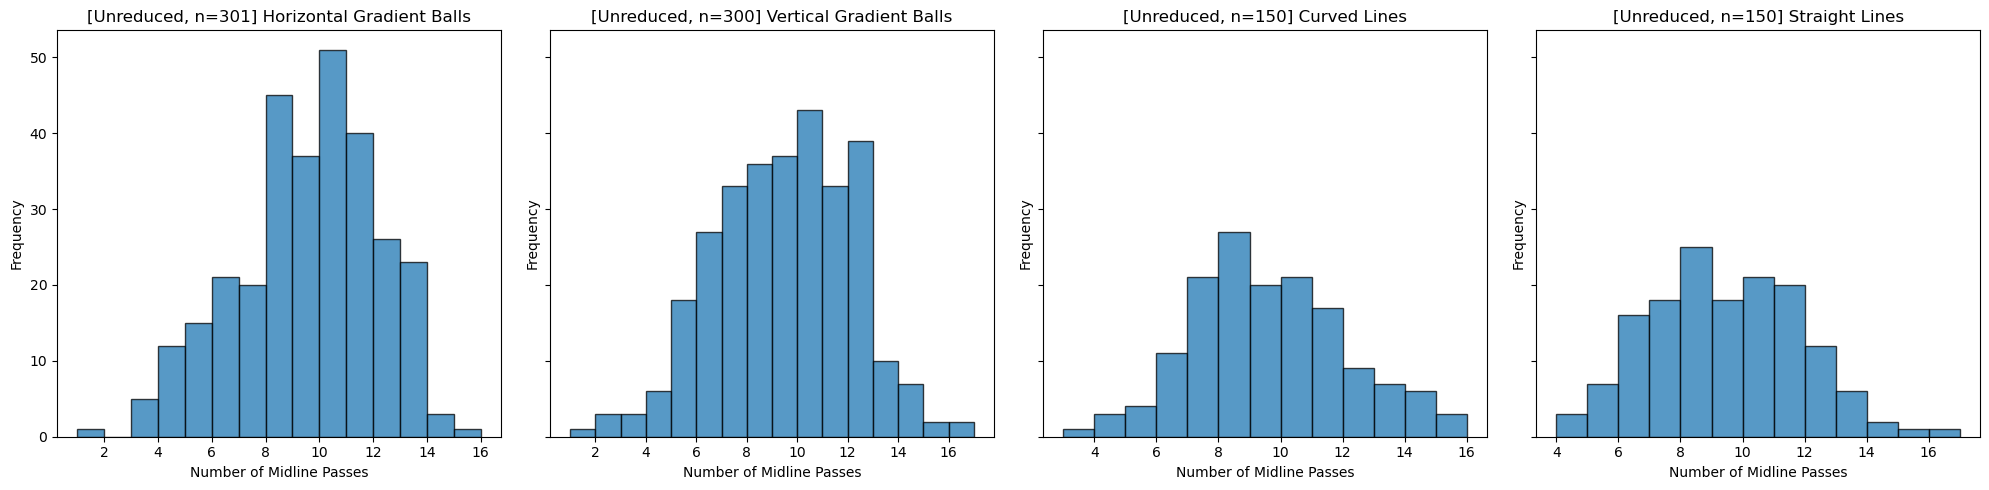

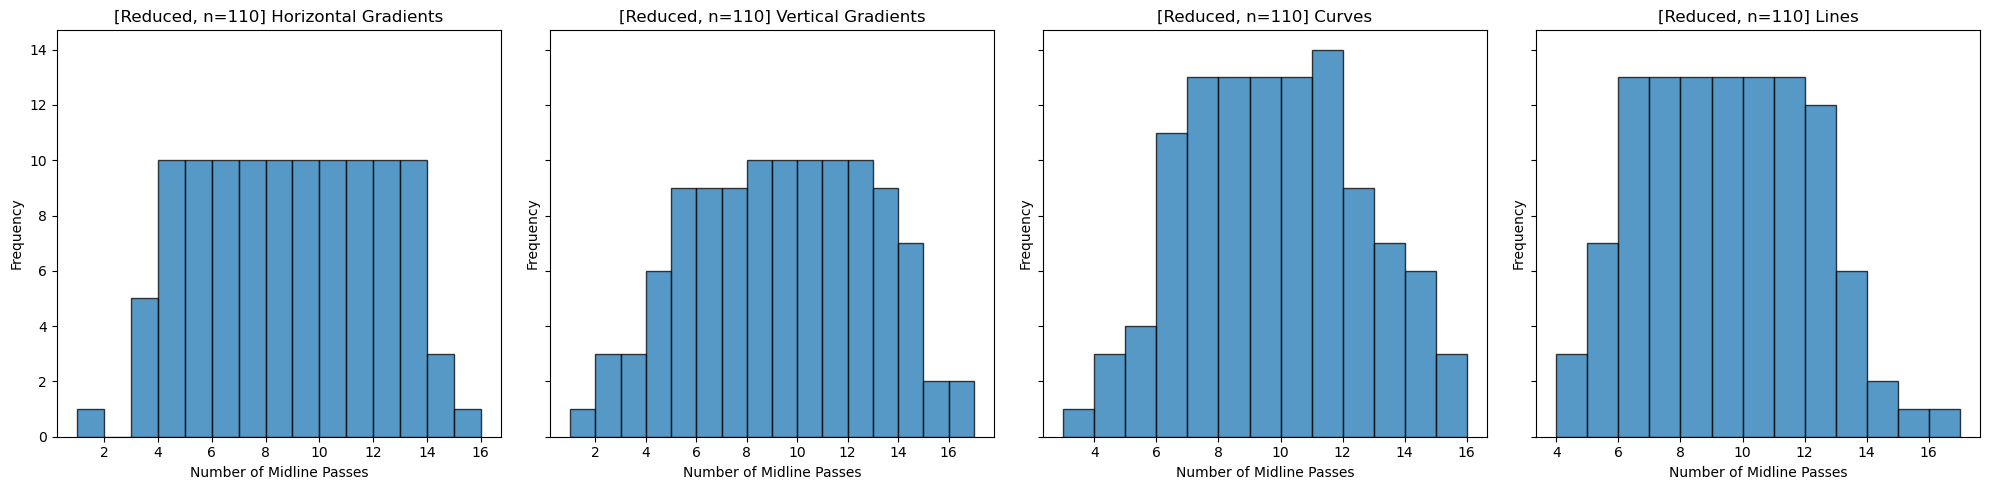

In [14]:
""" Determine distribution of midline pass counts for all videos per category. """

def collect_pass_counts(wkdir):
    pass_counts = []
    for root, _, files in os.walk(wkdir):
        for file in files:
            if file.startswith('select') and file.endswith('.txt'):
                select_file = os.path.join(root, file)
                with open(select_file, 'r') as f:
                    for line in f:
                        parts = line.split(',')
                        if len(parts) > 1:
                            try:
                                count = int(parts[1].strip())
                                pass_counts.append(count)
                            except ValueError:
                                continue
    return pass_counts

# def plot_distribution(pass_counts, title):
#     if not pass_counts:
#         print(f"No pass counts found for {title}.")
#         return
#     plt.hist(pass_counts, bins=range(min(pass_counts), max(pass_counts) + 2), edgecolor='black', alpha=0.75)
#     plt.title(f'Distribution of Midline Passes - {title}')
#     plt.xlabel('Number of Passes')
#     plt.ylabel('Frequency')
#     plt.show()

# def plot_distributions_for_folders(folders_to_process, folder_names):
#     for folder, name in zip(folders_to_process, folder_names):
#         pass_counts = collect_pass_counts(folder)
#         plot_distribution(pass_counts, name)


def plot_distributions_for_folders(folders_to_process, folder_names):
    num_folders = len(folders_to_process)
    fig, axes = plt.subplots(1, num_folders, figsize=(5 * num_folders, 5), sharey=True)
    
    for ax, folder, name in zip(axes, folders_to_process, folder_names):
        pass_counts = collect_pass_counts(folder)
        if not pass_counts:
            print(f"No pass counts found for {name}.")
            continue
        ax.hist(pass_counts, bins=range(min(pass_counts), max(pass_counts) + 2), edgecolor='black', alpha=0.75)
        ax.set_title(f'{name}')
        ax.set_xlabel('Number of Midline Passes')
        ax.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Unreduced filtered no target videos
before_reduction_folders = [
    "/Users/nandinibohra/Downloads/Final_Videos_NoTarget/Final_Videos_NoTarget_withInfo/Gradient_Balls_H_Merged",
    "/Users/nandinibohra/Downloads/Final_Videos_NoTarget/Final_Videos_NoTarget_withInfo/Gradient_Balls_V_Merged",
    "/Users/nandinibohra/Downloads/Final_Videos_NoTarget/Final_Videos_NoTarget_withInfo/Curves",
    "/Users/nandinibohra/Downloads/Final_Videos_NoTarget/Final_Videos_NoTarget_withInfo/Lines"
]
unreduced_folder_names = [
    "[Unreduced, n=301] Horizontal Gradient Balls",
    "[Unreduced, n=300] Vertical Gradient Balls",
    "[Unreduced, n=150] Curved Lines",
    "[Unreduced, n=150] Straight Lines"
]

plot_distributions_for_folders(before_reduction_folders, unreduced_folder_names)

# Reduced filtered no target videos
after_reduction_folders = [
    "/Users/nandinibohra/Downloads/Final_Videos_NoTarget/Final_Videos_NoTarget_Reduced-Renamed/Gradient_Balls_H_Merged",
    "/Users/nandinibohra/Downloads/Final_Videos_NoTarget/Final_Videos_NoTarget_Reduced-Renamed/Gradient_Balls_V_Merged",
    "/Users/nandinibohra/Downloads/Final_Videos_NoTarget/Final_Videos_NoTarget_Reduced-Renamed/Curves",
    "/Users/nandinibohra/Downloads/Final_Videos_NoTarget/Final_Videos_NoTarget_Reduced-Renamed/Lines"
]

reduced_folder_names =[
    "[Reduced, n=110] Horizontal Gradients",
    "[Reduced, n=110] Vertical Gradients",
    "[Reduced, n=110] Curves",
    "[Reduced, n=110] Lines"
]

plot_distributions_for_folders(after_reduction_folders, reduced_folder_names)

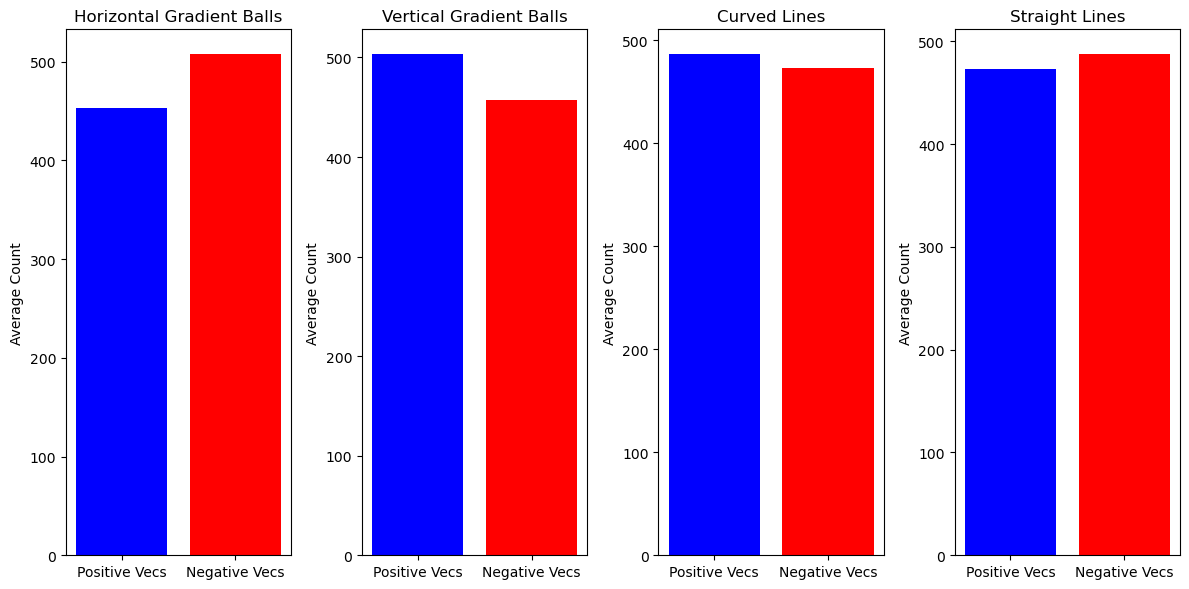

In [37]:
""" Detect bias in tracking ball trajectory by plotting num positive and negative direction vectors across all videos. """

# Opt 1: Calculate avg direction vector from JSON file of each video and plot # negative / positive avg vectors per category
# Opt 2: Calculate and plot avg # of negative / positive videos from all JSON per category

"""
def pos_and_neg_vec_counts(parent_dir):
    pos_vec_counts = []
    neg_vec_counts = []
    num_videos = num videos

    navigate to subfolder 1 in parent_dir
    for each subfolder in subfolder 1:
        navigate to json file 
        pos_vecs = 0
        neg_vecs = 0
        for each frame in json file metadata (starting at "0" and ending "959", 960 frames):
            find tracking ball data (last ball in dict)
            find vecs information in tracking ball data 
            if vec is positive:
                pos_vecs ++
            else:
                neg_vecs ++
        # append count of pos and negs of video to respective lists
        # lists should have num_videos number of elements at the end of loop
        pos_vec_counts.append(pos_vecs)
        neg_vec_counts.append(neg_vecs)

    return pos_vec_counts, neg_vec_counts

def avg_pos_neg_vecs(pos_vec_counts, neg_vec_counts):
    compute avg of pos_vec_counts
    compute avg of neg_vec_counts
    return both avgs

def plot_avgs(avgs):
    create a bar plot of avg # of pos and neg vectors across all videos in given category

def plot_all_graphs(dictionary of graph titles as keys and filepaths as values):
    create side by side bar graphs of avgs of pos and neg vecs

"""

def pos_and_neg_vec_counts(parent_dir):
    """ Counts positive, negative vectors for each vid in folder. """

    pos_vec_counts = []
    neg_vec_counts = []

    for subfolder1 in os.scandir(parent_dir):
        if subfolder1.is_dir():
            for subfolder2 in os.scandir(subfolder1.path):
                if subfolder2.is_dir():
                    for file in os.listdir(subfolder2.path):
                        if file.endswith('.json'):
                            json_file_path = os.path.join(subfolder2.path, file)
                            with open(json_file_path, 'r') as f:
                                metadata = json.load(f)
                                
                                pos_vecs = 0
                                neg_vecs = 0
                                
                                for key in sorted(metadata.keys()):
                                    if key.isdigit():  
                                        frame_data = metadata[key]
                                        tracking_ball_data = [entry for entry in frame_data if entry['stimulus_type'] == 'tracking']
                                        if tracking_ball_data:
                                            vec = tracking_ball_data[-1]['vec']
                                            if vec[0] > 0:
                                                pos_vecs += 1
                                            else:
                                                neg_vecs += 1
                                
                                pos_vec_counts.append(pos_vecs)
                                neg_vec_counts.append(neg_vecs)
    
    return pos_vec_counts, neg_vec_counts


def avg_pos_neg_vecs(pos_vec_counts, neg_vec_counts):
    """ Averages counts of positive, negative vectors across videos. """
    avg_pos_vecs = np.mean(pos_vec_counts) if pos_vec_counts else 0
    avg_neg_vecs = np.mean(neg_vec_counts) if neg_vec_counts else 0
    return avg_pos_vecs, avg_neg_vecs


def plot_avgs(avg_pos_neg):
    """ Plots averages for single folder / condition. """
    avg_pos_vecs, avg_neg_vecs = avg_pos_neg
    labels = ['Positive Vectors', 'Negative Vectors']
    values = [avg_pos_vecs, avg_neg_vecs]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, values, color=['blue', 'red'])
    plt.xlabel('Vector Type')
    plt.ylabel('Average Count')
    plt.title('Average Counts of Positive and Negative Vectors')
    plt.show()


def plot_all_graphs(graph_titles_and_filepaths):
    """ Plots averages for all passed folders. """
    
    num_graphs = len(graph_titles_and_filepaths)
    fig, axes = plt.subplots(1, num_graphs, figsize=(12, 6), squeeze=False)
    
    if num_graphs == 1:
        axes = axes[0]
    
    for ax, (title, filepath) in zip(axes.flat, graph_titles_and_filepaths.items()):
        pos_vec_counts, neg_vec_counts = pos_and_neg_vec_counts(filepath)
        avg_pos_neg = avg_pos_neg_vecs(pos_vec_counts, neg_vec_counts)
        
        categories = ['Positive Vecs', 'Negative Vecs']
        averages = avg_pos_neg
        
        ax.bar(categories, averages, color=['blue', 'red'])
        ax.set_title(title)
        ax.set_ylabel('Average Count')
    
    plt.tight_layout()
    plt.show()

# Test execution on test set of filtered target videos
folder_paths = {
    'Horizontal Gradient Balls': "/Users/nandinibohra/Downloads/sa_test_set_v1_download_rev-filter/sa_test_set_v1_TEST/Gradient_Balls_H_Merged-namingtest",
    'Vertical Gradient Balls': "/Users/nandinibohra/Downloads/sa_test_set_v1_download_rev-filter/sa_test_set_v1_TEST/Gradient_Balls_V_Merged",
    'Curved Lines': "/Users/nandinibohra/Downloads/sa_test_set_v1_download_rev-filter/sa_test_set_v1_TEST/NeurIPS_A",
    'Straight Lines':"/Users/nandinibohra/Downloads/sa_test_set_v1_download_rev-filter/sa_test_set_v1_TEST/NeurIPS_A_reverse"
}

plot_all_graphs(folder_paths)

0.005888961822840476 -0.02244114095493642
0.03768653054190747 0.006053731939995535
-0.048035025381218885 -0.0010224833099325647
-0.0481031612457017 -0.08599660217287092


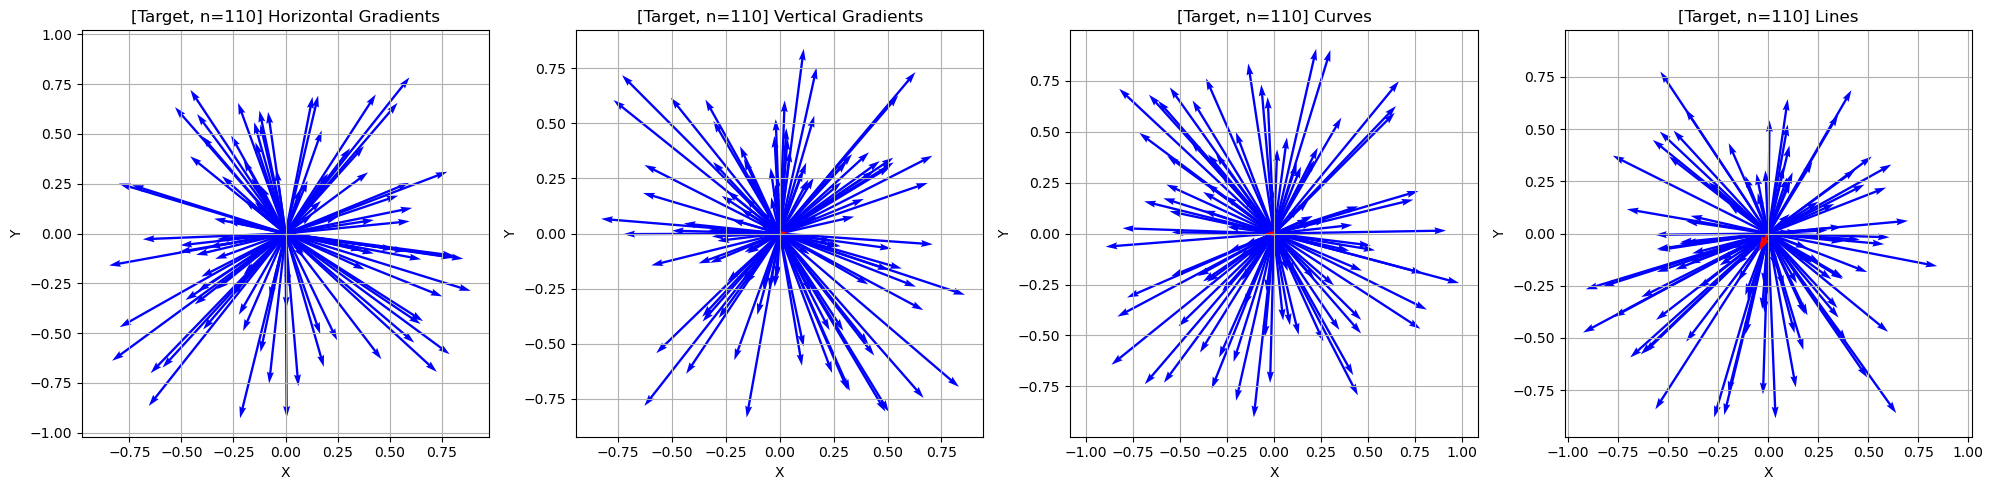

0.07293412468881902 -0.10827893034695572
0.07293412468881902 -0.10827893034695572
0.010501639051008241 -0.013498726627987751
0.026975945993496883 -0.06603658216404493


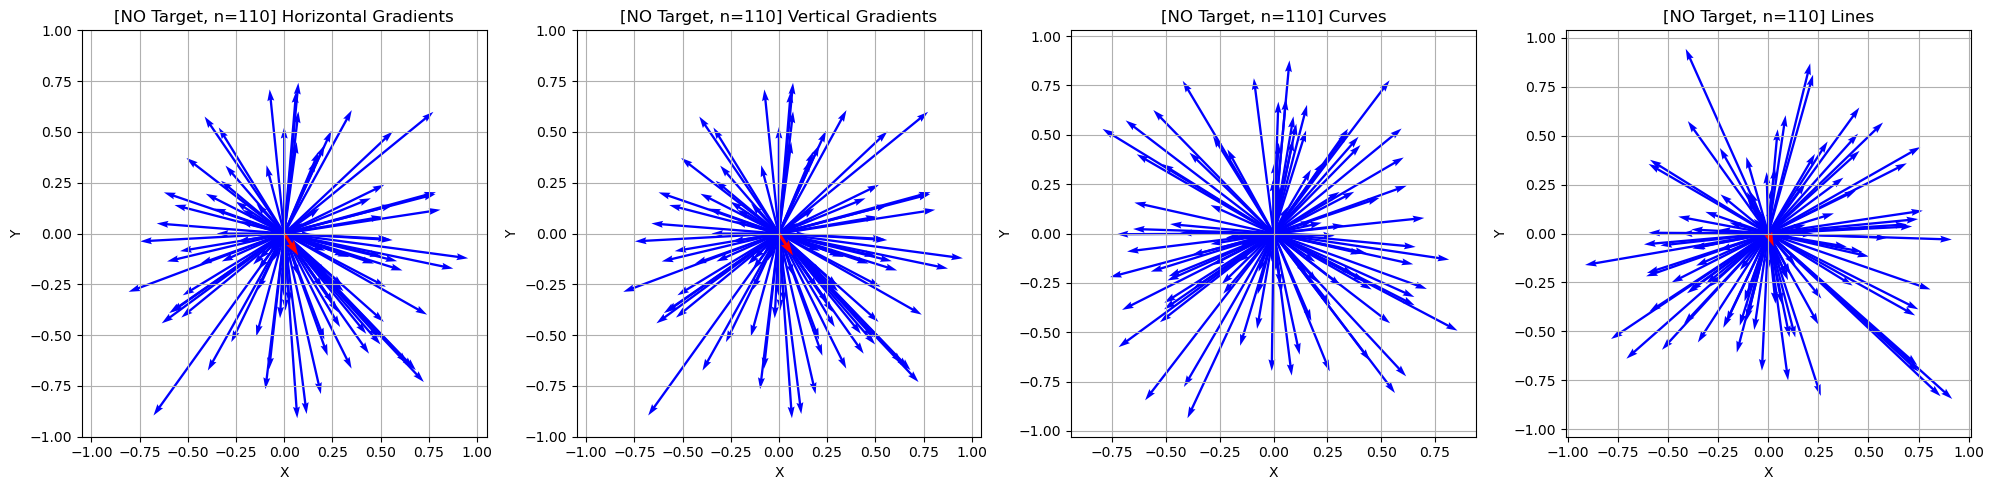

In [24]:
""" Detect bias in tracking ball trajectory by plotting avg direction vectors for each video. """

def calculate_average_vector(json_data):
    total_vector = np.array([0.0, 0.0])
    frame_count = 0

    for frame, frame_data in json_data.items():
        if frame.isdigit():
            for obj in frame_data:
                if obj["stimulus_type"] == "tracking":
                    total_vector += np.array(obj["vec"])
                    frame_count += 1

    if frame_count > 0:
        return total_vector / frame_count
    else:
        return None

def process_directory(parent_dir):
    subfolders_1 = [os.path.join(parent_dir, d) for d in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, d))]

    average_vectors = []

    for subfolder_1 in subfolders_1:
        subfolders_2 = [os.path.join(subfolder_1, d) for d in os.listdir(subfolder_1) if os.path.isdir(os.path.join(subfolder_1, d))]

        for subfolder_2 in subfolders_2:
            json_files = [f for f in os.listdir(subfolder_2) if f.endswith('.json')]
            
            for json_file in json_files:
                json_file_path = os.path.join(subfolder_2, json_file)
                with open(json_file_path, 'r') as f:
                    json_data = json.load(f)

                avg_vector = calculate_average_vector(json_data)
                if avg_vector is not None:
                    average_vectors.append(avg_vector)
    
    return np.array(average_vectors)


def plot_vectors(vectors, title, color='blue'):
    if len(vectors) == 0:
        print(f"No vectors to plot for {title}.")
        return
    plt.quiver([0] * len(vectors), [0] * len(vectors), vectors[:, 0], vectors[:, 1], color=color, angles='xy', scale_units='xy', scale=1)
    plt.title(title)
    plt.xlim(-max(np.abs(vectors[:, 0])) * 1.1, max(np.abs(vectors[:, 0])) * 1.1)
    plt.ylim(-max(np.abs(vectors[:, 1])) * 1.1, max(np.abs(vectors[:, 1])) * 1.1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    

def visualize_parent_directories(parent_directories, plot_titles):
    fig, axs = plt.subplots(1, len(parent_directories), figsize=(20, 5))

    for i, (parent_dir, title) in enumerate(zip(parent_directories, plot_titles)):
        vectors = process_directory(parent_dir)
        if len(vectors) == 0:
            continue
        
        average_of_all = np.mean(vectors, axis=0)
        print(average_of_all[0], average_of_all[1])
        
        plt.sca(axs[i])
        plot_vectors(vectors, title=title)
        plt.quiver(0, 0, average_of_all[0], average_of_all[1], color='red', angles='xy', scale_units='xy', scale=1)

    plt.tight_layout()
    plt.show()


# For TARGET Videos
target_parent_directories = [
    '/Users/nandinibohra/Downloads/Final_Videos_Target_RevisedFilter/Final_Videos_Target_VideosOnly/Gradient_Balls_H_Merged', 
    '/Users/nandinibohra/Downloads/Final_Videos_Target_RevisedFilter/Final_Videos_Target_VideosOnly/Gradient_Balls_V_Merged', 
    '/Users/nandinibohra/Downloads/Final_Videos_Target_RevisedFilter/Final_Videos_Target_VideosOnly/Curves', 
    '/Users/nandinibohra/Downloads/Final_Videos_Target_RevisedFilter/Final_Videos_Target_VideosOnly/Lines'
    ]

target_plot_titles = [
    '[Target, n=110] Horizontal Gradients', 
    '[Target, n=110] Vertical Gradients', 
    '[Target, n=110] Curves', 
    '[Target, n=110] Lines'
    ]
visualize_parent_directories(target_parent_directories, target_plot_titles)

# For NO TARGET Videos
no_target_parent_directories = [
    '/Users/nandinibohra/Downloads/Final_Videos_NoTarget/Final_Videos_NoTarget_VideosOnly/Gradient_Balls_H_Merged', 
    '/Users/nandinibohra/Downloads/Final_Videos_NoTarget/Final_Videos_NoTarget_VideosOnly/Gradient_Balls_H_Merged', 
    '/Users/nandinibohra/Downloads/Final_Videos_NoTarget/Final_Videos_NoTarget_VideosOnly/Curves', 
    '/Users/nandinibohra/Downloads/Final_Videos_NoTarget/Final_Videos_NoTarget_VideosOnly/Lines'
    ]

no_target_plot_titles = [
    '[NO Target, n=110] Horizontal Gradients', 
    '[NO Target, n=110] Vertical Gradients', 
    '[NO Target, n=110] Curves', 
    '[NO Target, n=110] Lines'
    ]
visualize_parent_directories(no_target_parent_directories, no_target_plot_titles)


Found 110 JSON files.


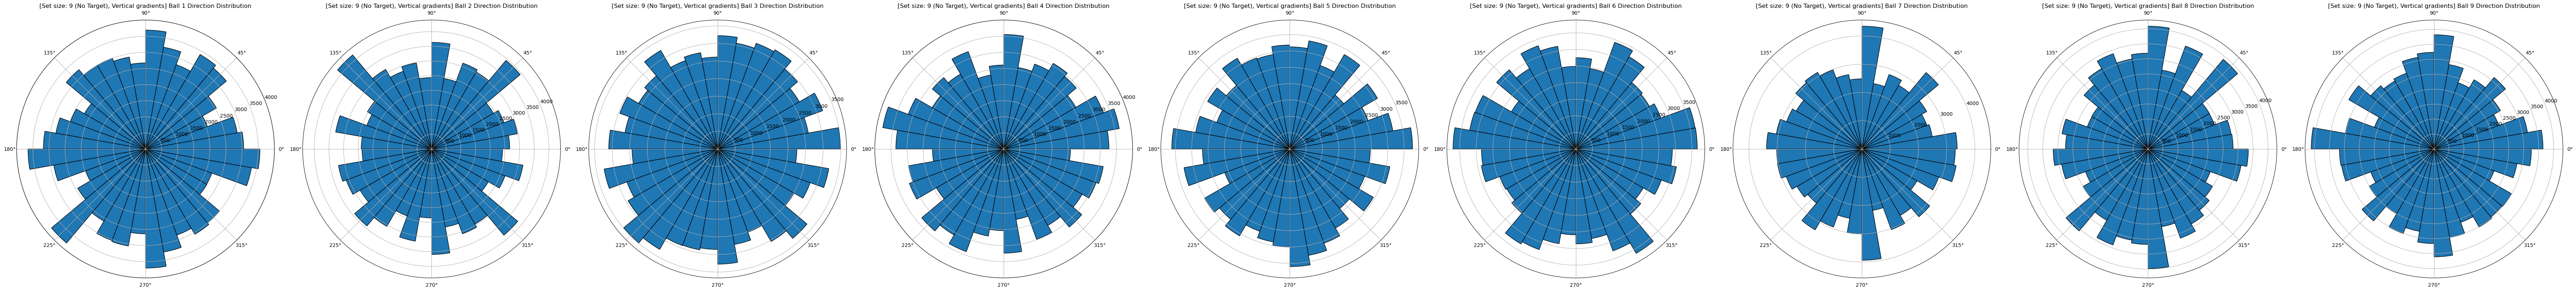

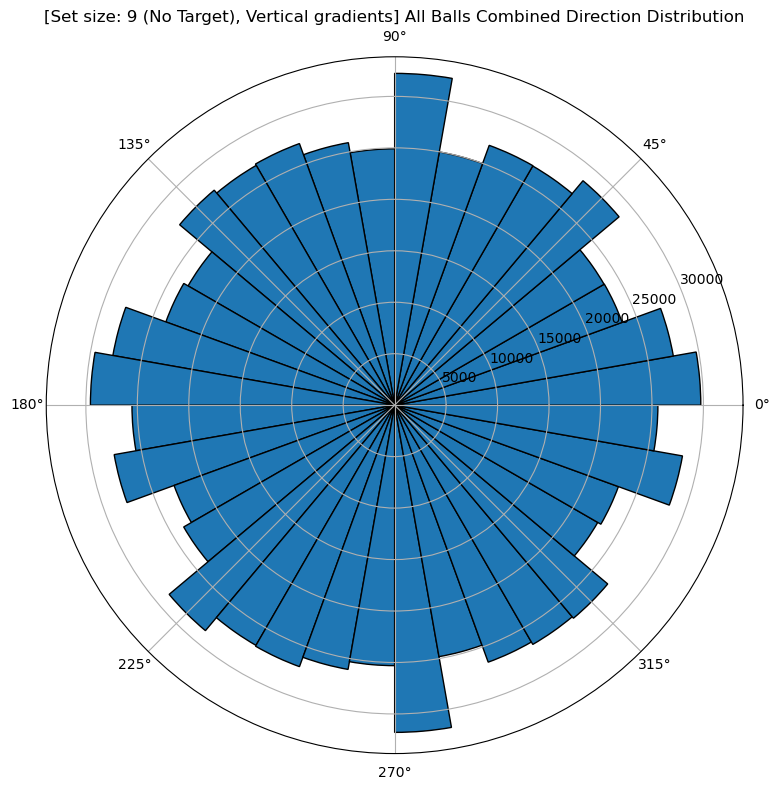

In [47]:
""" Analysis of trajectories for each ball + all balls combined to detect bias in movement if any. """

def vector_angles(vectors):
    """Calculate the angle of each vector."""
    try:
        return [np.arctan2(vec[1], vec[0]) for vec in vectors]
    except TypeError as e:
        print(f"Error processing vectors: {vectors}")
        raise e

def plot_circular_histograms(ball_vectors):
    """Plot circular histograms of vector angles for each ball side by side and a summary plot for all balls."""
    num_balls = len(ball_vectors)
    
    # Trajectory analysis per ball present in json file
    # Last ball == tracking ball
    # Ball with lesser frequency counts == target ball
    fig, axs = plt.subplots(1, num_balls, subplot_kw=dict(projection='polar'), figsize=(num_balls * 8, 8))
    
    if num_balls == 1:
        axs = [axs]  
    
    all_angles = [] 
    
    for ball_index, vectors in ball_vectors.items():
        flattened_vectors = [vec for vec_list in vectors for vec in (vec_list if isinstance(vec_list, list) else [vec_list])]
        angles = vector_angles(flattened_vectors)
        
        all_angles.extend(angles)
        
        hist, bin_edges = np.histogram(angles, bins=36, range=(-np.pi, np.pi))
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        axs[ball_index].bar(bin_centers, hist, width=np.pi / 18, align='center', edgecolor='black')
        axs[ball_index].set_title(f'[Set size: 9 (No Target), Vertical gradients] Ball {ball_index + 1} Direction Distribution') # CHANGE TITLE
    
    plt.tight_layout()
    plt.show()

    # Trajectory analysis for all balls combined, averaged over all balls
    fig_summary, ax_summary = plt.subplots(subplot_kw=dict(projection='polar'), figsize=(8, 8))
    
    hist_all, bin_edges_all = np.histogram(all_angles, bins=36, range=(-np.pi, np.pi))
    bin_centers_all = (bin_edges_all[:-1] + bin_edges_all[1:]) / 2
    ax_summary.bar(bin_centers_all, hist_all, width=np.pi / 18, align='center', edgecolor='black')
    ax_summary.set_title('[Set size: 9 (No Target), Vertical gradients] All Balls Combined Direction Distribution') # CHANGE TITLE
    
    plt.tight_layout()
    plt.show()

def analyze_vectors(json_files):
    """Analyze vector directions from JSON files and plot histograms."""
    ball_vectors = {}  
    
    for file in json_files:
        with open(file, 'r') as f:
            data = json.load(f)
        
        for key, frame_data in data.items():
            if key.isdigit():  
                for ball_index, ball_info in enumerate(frame_data):
                    if 'vec' in ball_info:
                        vec = np.array(ball_info['vec'])
                        if ball_index not in ball_vectors:
                            ball_vectors[ball_index] = []
                        ball_vectors[ball_index].append(vec)
    
    plot_circular_histograms(ball_vectors)

def find_json_files(parent_dir):
    """Find all JSON files in a parent directory, including subdirectories."""
    json_files = []
    for root, dirs, files in os.walk(parent_dir):
        for file in files:
            if file.endswith('.json'):
                json_files.append(os.path.join(root, file))
    print(f"Found {len(json_files)} JSON files.")
    return json_files

# Replace filepath
filepath = '/Users/nandinibohra/Downloads/Visual_Search_Stimuli/VisualSearchStimuli_Selected-withTxt-Renamed-subfolders/Videos_Without_TargetCopy /Gradient_Balls_V_Merged/NoTarget_9_V_n110'
json_files = find_json_files(filepath)
analyze_vectors(json_files)


Found 110 JSON files.


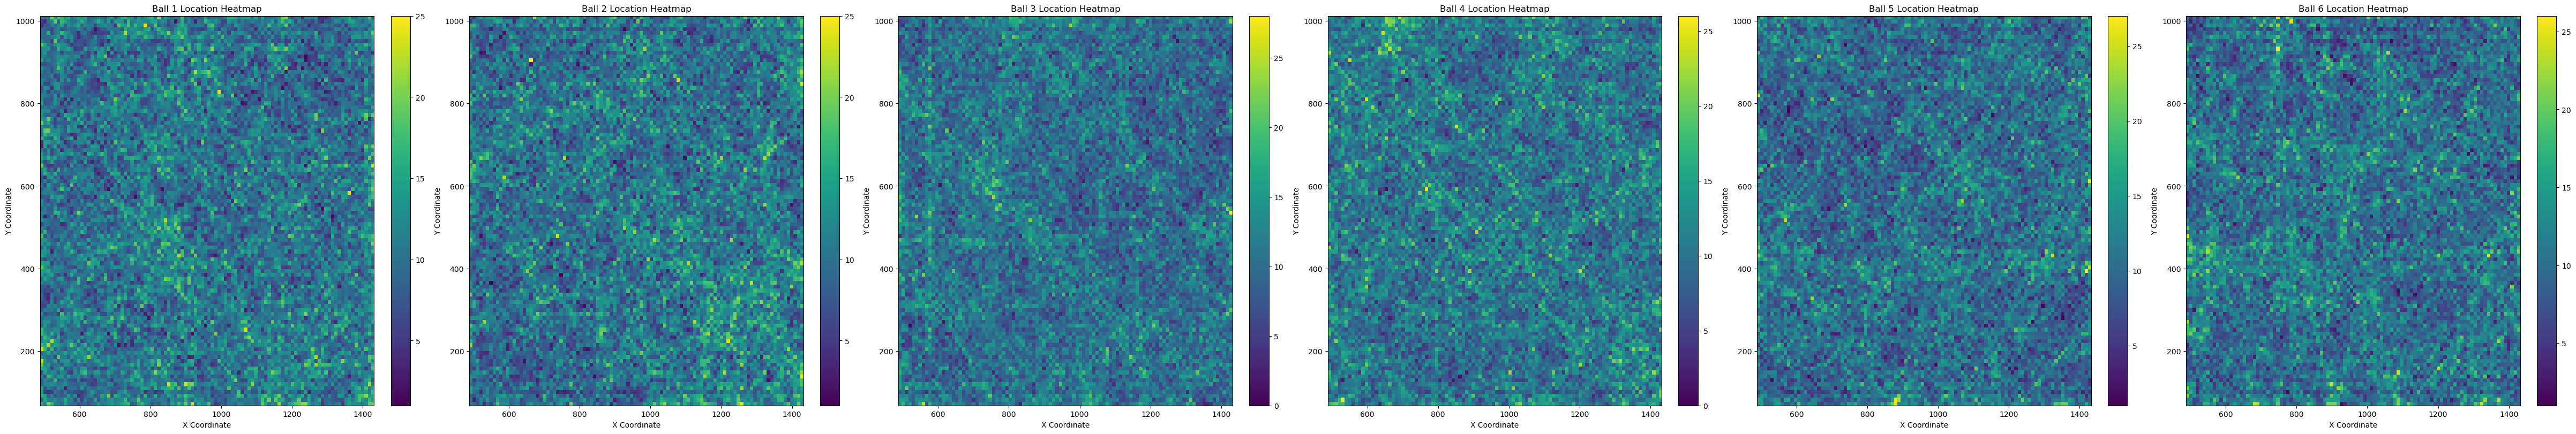

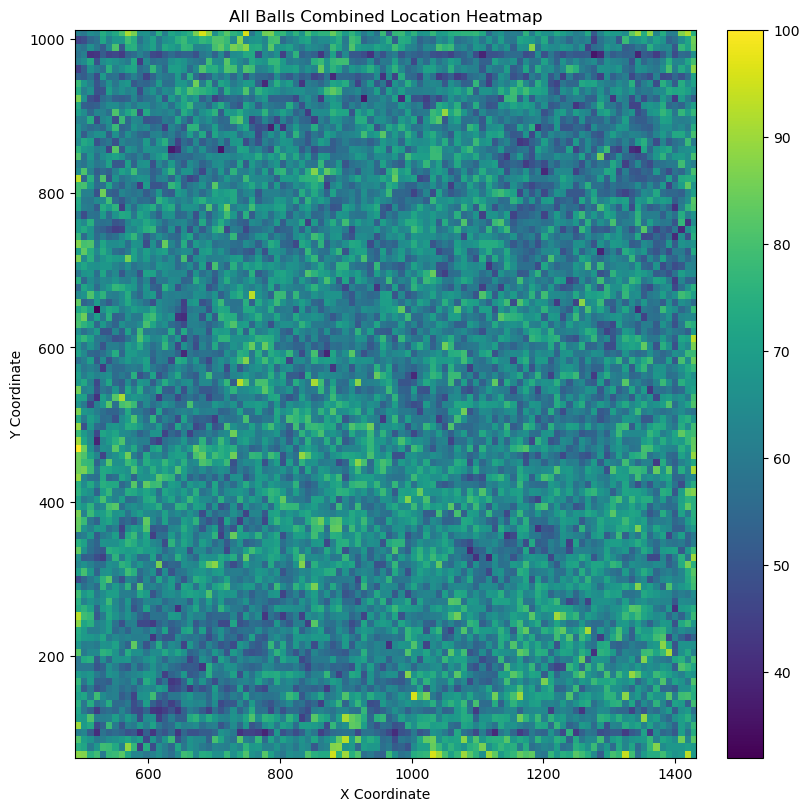

In [22]:
""" Analyze locations of balls based on coordinates of ball in json files to detect bias in ball movements if any. """

# Window size total is 1920 x 1080
# But region of interest is 488 < x < 1432 and 68 < y < 1012


def plot_heatmaps(ball_locations):
    """Plot heatmaps of ball locations for each ball side by side and a summary heatmap for all balls."""
    num_balls = len(ball_locations)
    fig, axs = plt.subplots(1, num_balls, figsize=(num_balls * 8, 8), constrained_layout=True)
    
    if num_balls == 1:
        axs = [axs]  
    
    all_locations = []  
    
    # Heatmaps of coords / locs for individual balls, per ball
    for ball_index, locations in ball_locations.items():
        locations = np.array(locations)
        
        all_locations.extend(locations)
        
        heatmap, xedges, yedges = np.histogram2d(locations[:, 0], locations[:, 1], bins=(100, 100), range=[[488, 1432], [68, 1012]])
        
        c = axs[ball_index].imshow(heatmap.T, origin='lower', cmap='viridis', extent=[488, 1432, 68, 1012], aspect='auto')
        axs[ball_index].set_title(f'Ball {ball_index + 1} Location Heatmap')
        axs[ball_index].set_xlabel('X Coordinate')
        axs[ball_index].set_ylabel('Y Coordinate')
        fig.colorbar(c, ax=axs[ball_index], orientation='vertical')

    plt.show()

    # Summary heatmap of coords / locs for all balls combined
    fig_summary, ax_summary = plt.subplots(figsize=(8, 8), constrained_layout=True)

    all_locations = np.array(all_locations)
    summary_heatmap, xedges, yedges = np.histogram2d(all_locations[:, 0], all_locations[:, 1], bins=(100, 100), range=[[488, 1432], [68, 1012]])
    
    c_summary = ax_summary.imshow(summary_heatmap.T, origin='lower', cmap='viridis', extent=[488, 1432, 68, 1012], aspect='auto')
    ax_summary.set_title('All Balls Combined Location Heatmap')
    ax_summary.set_xlabel('X Coordinate')
    ax_summary.set_ylabel('Y Coordinate')
    fig_summary.colorbar(c_summary, ax=ax_summary, orientation='vertical')

    plt.show()

def analyze_locations(json_files):
    """Analyze ball locations from JSON files and plot heatmaps."""
    ball_locations = {} 
    
    for file in json_files:
        with open(file, 'r') as f:
            data = json.load(f)
        
        for key, frame_data in data.items():
            if key.isdigit(): 
                for ball_index, ball_info in enumerate(frame_data):
                    if 'loc' in ball_info:
                        loc = ball_info['loc']
                        if ball_index not in ball_locations:
                            ball_locations[ball_index] = []
                        ball_locations[ball_index].append(loc)
    
    plot_heatmaps(ball_locations)

def find_json_files(parent_dir):
    """Find all JSON files in a parent directory, including subdirectories."""
    json_files = []
    for root, dirs, files in os.walk(parent_dir):
        for file in files:
            if file.endswith('.json'):
                json_files.append(os.path.join(root, file))
    print(f"Found {len(json_files)} JSON files.")
    return json_files

filepath = '/Users/nandinibohra/Downloads/InLab_Files/RightSetSize_OriginalFiles_withInfo/NeurIPS_A_6'
json_files = find_json_files(filepath)
analyze_locations(json_files)


dictionary of frame number: frame information
where frame information is a list of len = num balls with dictionaries on each ball information
where each ball information dictionary is organized like: 
   stimulus type : distractor or tracking
   loc: coordinate location of ball given as a list with len 2
   vec: vector of ball movement given as a list with len 2



parent-dir -> subfolder 1 (can have different name) -> n number of subfolders -> each subfolder contains one json file (means a total of n json files to analyze)